In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_subset = pd.read_csv("data/data_subset.csv", index_col=0)

In [6]:
df_subset 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
13053234,3ED5C1DF57AF0CFC,classic_bike,2022-07-31 11:12:03,2022-07-31 11:23:22,Amsterdam Ave & W 156 St,8104.10,St. Nicholas Ave & W 126 St,7756.10,40.832081,-73.942386,40.811432,-73.951878,member,2022-07-31,26.3,both
5511,34A11D1AB59E0BF1,classic_bike,2022-01-10 20:39:41,2022-01-10 20:57:07,Carmine St & 6 Ave,5763.03,11 Ave & W 27 St,6425.04,40.730386,-74.002150,40.751396,-74.005226,member,2022-01-10,1.6,both
4327378,B831690106F78D6C,classic_bike,2022-04-01 16:19:23,2022-04-01 16:28:58,Montrose Ave & Bushwick Ave,5068.02,Leonard St & Maujer St,5148.03,40.707678,-73.940162,40.710369,-73.947060,casual,2022-04-01,13.1,both
15808136,5DF69B0BE03C5263,classic_bike,2022-07-15 14:38:41,2022-07-15 14:46:18,Macon St & Nostrand Ave,4214.03,Classon Ave & St Marks Ave,4074.03,40.680983,-73.950048,40.676520,-73.959608,member,2022-07-15,26.1,both
28706480,A48A9446A7EB145F,classic_bike,2022-11-05 15:44:04,2022-11-05 15:58:50,West St & Liberty St,5184.08,Bus Slip & State St,4889.06,40.711444,-74.014847,40.701907,-74.013942,casual,2022-11-05,19.4,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25609017,251C9D7847E4489F,classic_bike,2022-10-26 18:53:11,2022-10-26 18:59:46,Central Park West & W 68 St,7079.06,W 87 St & West End Ave,7484.05,40.773331,-73.978174,40.789622,-73.977570,member,2022-10-26,18.3,both
19329930,ED32A8EF49803B5A,classic_bike,2022-08-27 00:26:34,2022-08-27 00:44:35,Nassau Ave & Russell St,5581.01,S 5 Pl & S 5 St,5125.03,40.725570,-73.944340,40.710451,-73.960876,casual,2022-08-27,27.8,both
26264377,1A2E9D42B9D6F682,classic_bike,2022-10-23 12:46:13,2022-10-23 12:49:47,Seaman Ave & Isham St,8665.02,10 Ave & W 207 St,8613.09,40.869899,-73.920763,40.864632,-73.918598,member,2022-10-23,14.7,both
3873168,7FDF5AD0C48A7E04,electric_bike,2022-03-31 17:37:34,2022-03-31 17:43:25,5 Ave & 3 St,3987.06,3 St & Prospect Park West,3865.05,40.672815,-73.983524,40.668132,-73.973638,member,2022-03-31,9.9,both


In [7]:
df_temp = df_subset.set_index('date')

In [8]:
df_temp=df_temp.sort_index()

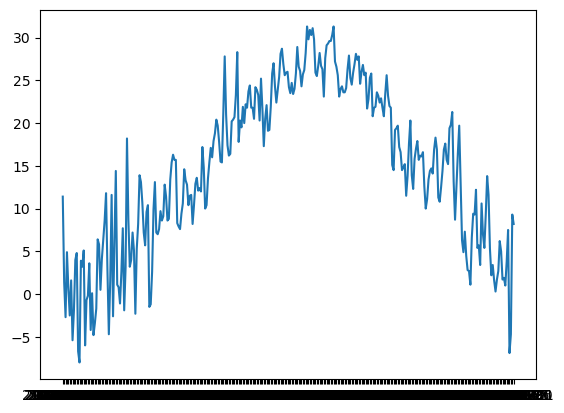

In [9]:
plt.plot(df_temp['avgTemp'])
plt.show()

In [10]:
# Group by the count of the trips

df_group = pd.DataFrame(df_subset.groupby('date')['ride_id'].count()).reset_index()

In [11]:
df_group

,date,ride_id
0,2022-01-02,2
1,2022-01-03,1
2,2022-01-04,1
3,2022-01-06,3
4,2022-01-07,2
...,...,...
319,2022-12-23,1
320,2022-12-25,1
321,2022-12-26,1
322,2022-12-30,2


In [12]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df_subset = df_subset.merge(df_group, on = 'date', how = 'outer')



In [13]:
df_subset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,bike_rides_daily
0,AC76F5E4EFDCE317,electric_bike,2022-01-02 16:20:01,2022-01-02 16:22:34,Lexington Ave & E 111 St,7567.06,E 115 St & Madison Ave,7599.02,40.795412,-73.944123,40.798944,-73.944846,casual,2022-01-02,11.4,both,2
1,E121DC402DB250F1,classic_bike,2022-01-02 14:28:05,2022-01-02 14:58:12,48 St & 5 Ave,3202.06,Bond St & Bergen St,4404.10,40.646351,-74.009271,40.684967,-73.986208,member,2022-01-02,11.4,both,2
2,67E6F94A7B94F776,electric_bike,2022-01-03 20:11:00,2022-01-03 20:15:17,E 156 & Brook Ave,7896.11,E 161 St & Park Ave,7979.17,40.819823,-73.912411,40.824811,-73.916407,member,2022-01-03,1.4,both,1
3,441B0C0506D400C2,classic_bike,2022-01-04 12:43:34,2022-01-04 12:46:59,E 33 St & 1 Ave,6197.08,E 39 St & 2 Ave,6345.08,40.743227,-73.974498,40.748033,-73.973828,casual,2022-01-04,-2.7,both,1
4,99005ACE9002E034,electric_bike,2022-01-06 23:05:29,2022-01-06 23:12:23,W 37 St & 10 Ave,6611.02,W 52 St & 11 Ave,6926.01,40.756604,-73.997901,40.767272,-73.993929,member,2022-01-06,4.9,both,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1909EEBDB8561EF3,classic_bike,2022-12-25 16:51:22,2022-12-25 17:11:28,Sands St & Jay St,4821.03,Cliff St & Fulton St,5065.14,40.700119,-73.986200,40.708380,-74.004950,member,2022-12-25,-6.9,both,1
996,835FC1877F5B64A2,classic_bike,2022-12-26 15:17:21,2022-12-26 15:37:04,Brooklyn Ave & Dean St,4131.03,Kingston Ave & Park Pl,4016.03,40.676786,-73.944239,40.673080,-73.941910,member,2022-12-26,-4.7,both,1
997,4C5C1A46D62AA1BC,classic_bike,2022-12-30 12:44:40,2022-12-30 12:48:00,E 23 St & 1 Ave,5929.01,E 17 St & 2 Ave,5896.01,40.736502,-73.978095,40.734312,-73.983725,member,2022-12-30,9.3,both,2
998,39BD3E36E8E24D86,classic_bike,2022-12-30 15:22:03,2022-12-30 15:27:33,46 St & 25 Ave,6907.03,Steinway St & Ditmars Blvd,7074.01,40.765992,-73.906829,40.772717,-73.906127,member,2022-12-30,9.3,both,2


In [1]:
ax2 = ax.twinx()
ax2.plot(df_subset["avgTemp"], color="red")

NameError: name 'ax' is not defined

In [2]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df_subset['bike_rides_daily'],color = "red")
ax2 = ax.twinx()
ax2.plot(df_temp["avgTemp"], color = "blue")
plt.show()

NameError: name 'plt' is not defined

KeyError: 'bike_rides_daily'

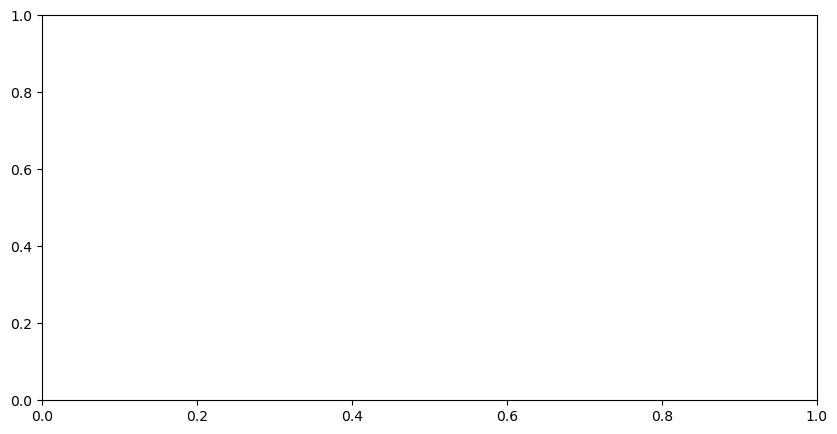

In [16]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_subset['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2018", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_temp['avgTemp'], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2018', fontsize = 18)
plt.show()

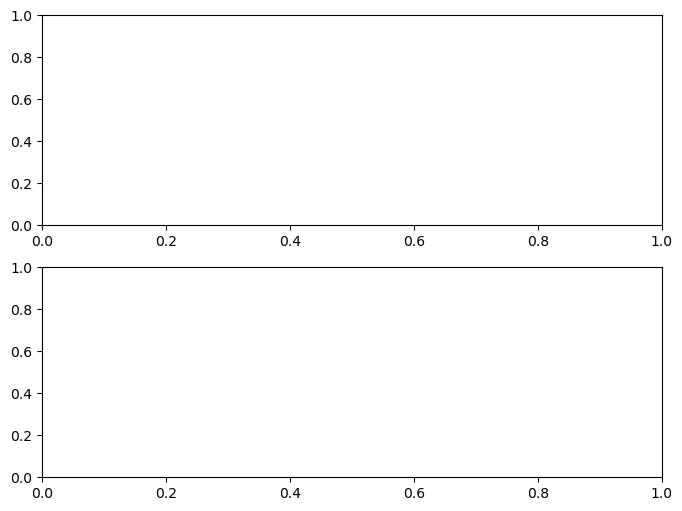

In [17]:
fig,ax = plt.subplots(2, figsize =(8, 6))

In [18]:
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

KeyError: 'bike_rides_daily'

KeyError: 'bike_rides_daily'

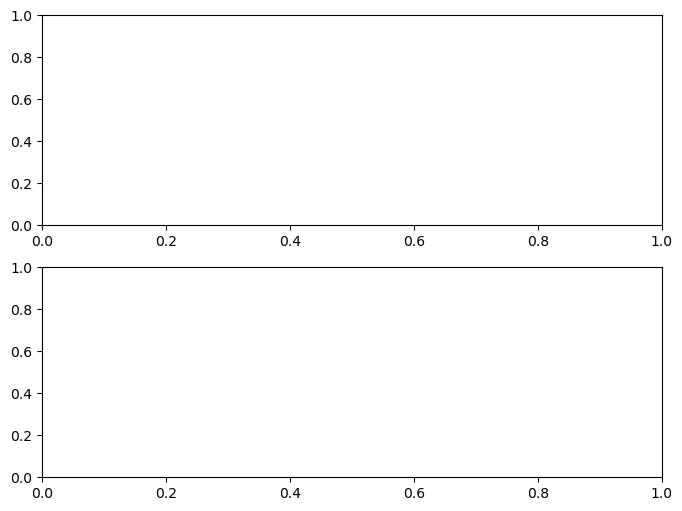

In [19]:
# Create figure and axis objects with subplots() and details

Fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatures on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.subtitle('Temperature and trips in 2018', fontsize = 18)



In [ ]:
plt.show()

In [22]:
df_subset.to_csv("data/data_subset.csv")

In [23]:
import os


print("Current working directory:", os.getcwd())


file_path = 'data/data_subset.csv'

full_path = os.path.join(os.getcwd(), file_path)
print("Full path to file:", full_path)

print("Does the file exist?", os.path.exists(full_path))


Current working directory: C:\Users\maryp\2.2
Full path to file: C:\Users\maryp\2.2\data/data_subset.csv
Does the file exist? True


In [ ]:
#In a markdown cell, briefly explain your code; how did you use Matplotlib to achieve this? Which paradigm did you use?

### Code Explanation and Matplotlib Usage

In the script, I leveraged the Matplotlib library to create a line graph that visually represents changes in data over time. Here's a step-by-step breakdown of how Matplotlib was used to achieve this:

1. **Importing the Library**: The script starts with importing Matplotlib's `pyplot` module. This module provides functions that make Matplotlib work like MATLAB, which simplifies plotting by allowing you to create figures and axes implicitly on the first plot command.

    ```python
    import matplotlib.pyplot as plt
    ```

2. **Preparing Data**: The x-values (time points) and y-values (data points) are defined using lists. This simple data structure is sufficient for this type of plot.

    ```python
    x = range(10)
    y = [xi**2 for xi in x]  # Example data: y is the square of x
    ```

3. **Creating the Plot**: A line plot is created by calling `plt.plot(x, y)`. This function automatically creates a figure and an axes object in the background.

    ```python
    plt.plot(x, y)
    ```

4. **Enhancing the Plot**: Titles and labels are added to make the plot informative. This includes labeling the x and y axes, and adding a title at the top.

    ```python
    plt.title("Simple Line Plot")
    plt.xlabel("Time")
    plt.ylabel("Value")
    ```

5. **Displaying the Plot**: Finally, `plt.show()` is used to display the plot. This function is necessary to actually render the plot visually in the output.

    ```python
    plt.show()
    ```

### Programming Paradigm

The programming paradigm used in this example is **procedural programming**. This style is characterized by a series of procedure calls or function calls in a specific sequence. Each function performs a part of the task of creating a plot, such as generating data, plotting data, and annotating the plot. This paradigm is particularly straightforward and effective for scripts and smaller programs where simple, linear execution is sufficient. It contrasts with object-oriented programming, which might involve creating and manipulating plot objects directly for more complex visualizations.
